In [1]:
from imp import reload
from matplotlib.pylab import subplots, hist, figure
import matplotlib.pyplot as plt
import numpy as np
import tifffile as tiff
%matplotlib inline
import tables as tb
from os.path import join
import watershed3d
reload(watershed3d)

<module 'watershed3d' from './watershed3d.py'>

In [5]:
file1_nuc = '/media/data/jakob/HE_quantification/Human_embryos/Ex24w3_D_OCT4nc_pSMAD158nc_NANOG594nc_3_2_16/10_Ex24w3_D_OCT4nc_pSMAD158nc_NANOG594nc_3_2_16_C1.tif'
# file1_nuc = '/Users/jakob/Documents/RU/Data/HE_quantification/Human_embryos/Ex24w3_D_OCT4nc_pSMAD158nc_NANOG594nc_3_2_16/10_Ex24w3_D_OCT4nc_pSMAD158nc_NANOG594nc_3_2_16_C1.tif'
w = watershed3d.Ws3d(file1_nuc)

image is three-dimensional


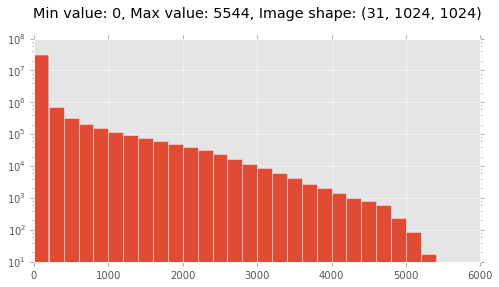

In [6]:
w.intensity_histogram()

In [7]:
w.load_mask(prob=0.5)

shape (31, 1024, 1024) (31, 1024, 1024)
loaded probability map


In [8]:
w.segment(do_not_use_object_classifier=1, sigma=(2,6,6), min_distance=1)

TypeError: Only 2-D images supported.